## SURVEI PECINTA HEWAN DI PRASETIYA MULYA

### Kelompok 4 - BM2020C

1. Ida Bagus Putra Brahmavidya (23102010085)
2. Dharma Vittanio Subagyo (23102010018)
3. Livia Novita Gianto (23102010003)
4. Steven Salim (23102010046)

### Import Package

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set(style='darkgrid')

### Import Dataset

In [2]:
df=pd.read_csv('responses.csv')
df

,Timestamp,Apakah Anda merupakan Mahasiswa Universitas Prasetiya Mulya?,Jenis Kelamin,Usia,Fakultas Mahasiswa,Jurusan,Angkatan,Apakah anda merupakan pecinta hewan?,Apakah anda pernah memiliki hewan peliharaan?,Berapa jumlah hewan peliharaan yang anda miliki saat ini?,"Menurut anda, berapa jumlah hewan peliharaan yang wajar dipelihara oleh pemilik hewan peliharaan?",Apa jenis hewan favorit anda?,Berapa rata-rata pengeluaran mingguan anda?,Berapa rata-rata uang yang biasa anda keluarkan untuk hewan peliharaan dalam satu minggu?,Apakah anda pernah berdonasi atau berpartisipasi dalam komunitas pelindung hewan?,Berapa rata-rata waktu (dalam menit) yang anda habiskan untuk diri sendiri (me time) dalam satu hari?,Berapa rata-rata waktu (dalam menit) yang anda habiskan untuk bersosialisasi dalam satu hari?,Berapa rata-rata waktu (dalam menit) yang anda habiskan untuk berinteraksi dengan hewan peliharaan dalam satu hari?,Berapa rata-rata waktu (dalam menit) yang anda habiskan untuk belajar atau berorganisasi dalam satu hari?
0,5/24/2023 19:34:18,Ya,Laki-laki,20.0,STEM (School of Applied Science Technology Eng...,Business Mathematics,2021.0,Ya,Ya,2.0,2.0,Anjing,3500000.0,10000.0,Tidak Pernah,180.0,60.0,20.0,120.0
1,5/24/2023 19:41:08,Ya,Laki-laki,21.0,STEM (School of Applied Science Technology Eng...,Business Mathematics,2020.0,Ya,Ya,2.0,2.0,Anjing,200000.0,50000.0,Tidak Pernah,360.0,120.0,60.0,60.0
2,5/24/2023 19:59:18,Ya,Laki-laki,20.0,STEM (School of Applied Science Technology Eng...,Business Mathematics,2020.0,Ya,Ya,1.0,3.0,Kucing,185000.0,182500.0,Tidak Pernah,300.0,120.0,60.0,600.0
3,5/24/2023 21:23:23,Ya,Laki-laki,21.0,STEM (School of Applied Science Technology Eng...,Business Mathematics,2020.0,Ya,Ya,0.0,2.0,Anjing,100000.0,0.0,Tidak Pernah,180.0,120.0,0.0,60.0
4,5/24/2023 21:54:21,Ya,Perempuan,22.0,SBE (School of Business and Economics),Business,2019.0,Tidak,Tidak,0.0,0.0,Lainnya,250000.0,0.0,Tidak Pernah,240.0,45.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,6/12/2023 11:36:50,Ya,Laki-laki,21.0,SBE (School of Business and Economics),Business,2020.0,Ya,Ya,3.0,3.0,Kucing,750000.0,150000.0,Pernah,360.0,240.0,120.0,180.0
323,6/12/2023 11:40:33,Ya,Laki-laki,22.0,SBE (School of Business and Economics),Business,2019.0,Tidak,Tidak,0.0,2.0,Lainnya,1000000.0,0.0,Tidak Pernah,360.0,360.0,0.0,180.0
324,6/12/2023 11:48:50,Ya,Laki-laki,21.0,SBE (School of Business and Economics),Branding,2020.0,Ya,Ya,4.0,3.0,Anjing,500000.0,250000.0,Tidak Pernah,480.0,120.0,180.0,180.0
325,6/12/2023 12:26:51,Ya,Laki-laki,21.0,SBE (School of Business and Economics),Business,2020.0,Tidak,Ya,1.0,1.0,Kucing,2000000.0,200000.0,Tidak Pernah,540.0,60.0,30.0,300.0


### About the Data

Survei ini dilakukan untuk mengetahui jumlah pecinta hewan di Universitas Prasetiya Mulya berdasarkan sampel 327 responden yang telah kami kumpulkan dari tanggal 25 Mei 2023 hingga 12 Juni 2023. Data ini terdiri dari 11 Independen Variabel:

$x_1$ : Kepemilikan Hewan
$x_2$ : Jumlah Peliharaan
$x_3$ : Jumlah Wajar
$x_4$ : Hewan Favorit
$x_5$ : Pengeluaran Mingguan
$x_6$ : Pengeluaran Mingguan untuk Hewan
$x_7$ : Donasi dan Partisipasi Komunitas Pelindung Hewan
$x_8$ : Me Time
$x_9$ : Waktu Sosialisasi
$x_{10}$ : Waktu Interaksi dengan Hewan
$x_{11}$ : Waktu Belajar
Dependen Variabel (y) : Pecinta Hewan






Informasi awal terkait dataset yang digunakan

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 19 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   Timestamp                                                                                                            327 non-null    object 
 1   Apakah Anda merupakan Mahasiswa Universitas Prasetiya Mulya?                                                         327 non-null    object 
 2   Jenis Kelamin                                                                                                        320 non-null    object 
 3   Usia                                                                                                                 320 non-null    float64
 4   Fakultas Mahas

## DATA PREPARATION

### Check Missing Value

In [4]:
df.isnull().sum()

Timestamp                                                                                                               0
Apakah Anda merupakan Mahasiswa Universitas Prasetiya Mulya?                                                            0
Jenis Kelamin                                                                                                           7
Usia                                                                                                                    7
Fakultas Mahasiswa                                                                                                      7
Jurusan                                                                                                                16
Angkatan                                                                                                                9
Apakah anda merupakan pecinta hewan?                                                                                    7
Apakah anda pernah memil

### Drop Missing Value

In [5]:
df1=df.dropna()
df1

,Timestamp,Apakah Anda merupakan Mahasiswa Universitas Prasetiya Mulya?,Jenis Kelamin,Usia,Fakultas Mahasiswa,Jurusan,Angkatan,Apakah anda merupakan pecinta hewan?,Apakah anda pernah memiliki hewan peliharaan?,Berapa jumlah hewan peliharaan yang anda miliki saat ini?,"Menurut anda, berapa jumlah hewan peliharaan yang wajar dipelihara oleh pemilik hewan peliharaan?",Apa jenis hewan favorit anda?,Berapa rata-rata pengeluaran mingguan anda?,Berapa rata-rata uang yang biasa anda keluarkan untuk hewan peliharaan dalam satu minggu?,Apakah anda pernah berdonasi atau berpartisipasi dalam komunitas pelindung hewan?,Berapa rata-rata waktu (dalam menit) yang anda habiskan untuk diri sendiri (me time) dalam satu hari?,Berapa rata-rata waktu (dalam menit) yang anda habiskan untuk bersosialisasi dalam satu hari?,Berapa rata-rata waktu (dalam menit) yang anda habiskan untuk berinteraksi dengan hewan peliharaan dalam satu hari?,Berapa rata-rata waktu (dalam menit) yang anda habiskan untuk belajar atau berorganisasi dalam satu hari?
0,5/24/2023 19:34:18,Ya,Laki-laki,20.0,STEM (School of Applied Science Technology Eng...,Business Mathematics,2021.0,Ya,Ya,2.0,2.0,Anjing,3500000.0,10000.0,Tidak Pernah,180.0,60.0,20.0,120.0
1,5/24/2023 19:41:08,Ya,Laki-laki,21.0,STEM (School of Applied Science Technology Eng...,Business Mathematics,2020.0,Ya,Ya,2.0,2.0,Anjing,200000.0,50000.0,Tidak Pernah,360.0,120.0,60.0,60.0
2,5/24/2023 19:59:18,Ya,Laki-laki,20.0,STEM (School of Applied Science Technology Eng...,Business Mathematics,2020.0,Ya,Ya,1.0,3.0,Kucing,185000.0,182500.0,Tidak Pernah,300.0,120.0,60.0,600.0
3,5/24/2023 21:23:23,Ya,Laki-laki,21.0,STEM (School of Applied Science Technology Eng...,Business Mathematics,2020.0,Ya,Ya,0.0,2.0,Anjing,100000.0,0.0,Tidak Pernah,180.0,120.0,0.0,60.0
4,5/24/2023 21:54:21,Ya,Perempuan,22.0,SBE (School of Business and Economics),Business,2019.0,Tidak,Tidak,0.0,0.0,Lainnya,250000.0,0.0,Tidak Pernah,240.0,45.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,6/12/2023 9:24:48,Ya,Laki-laki,21.0,SBE (School of Business and Economics),Business,2020.0,Ya,Tidak,0.0,3.0,Lainnya,1000000.0,0.0,Tidak Pernah,480.0,240.0,0.0,180.0
322,6/12/2023 11:36:50,Ya,Laki-laki,21.0,SBE (School of Business and Economics),Business,2020.0,Ya,Ya,3.0,3.0,Kucing,750000.0,150000.0,Pernah,360.0,240.0,120.0,180.0
323,6/12/2023 11:40:33,Ya,Laki-laki,22.0,SBE (School of Business and Economics),Business,2019.0,Tidak,Tidak,0.0,2.0,Lainnya,1000000.0,0.0,Tidak Pernah,360.0,360.0,0.0,180.0
324,6/12/2023 11:48:50,Ya,Laki-laki,21.0,SBE (School of Business and Economics),Branding,2020.0,Ya,Ya,4.0,3.0,Anjing,500000.0,250000.0,Tidak Pernah,480.0,120.0,180.0,180.0


### Check Duplicated Data

In [6]:
df1.duplicated().sum()

0

Tidak ditemukan data yang terduplikasi

### Drop Timestamp Column

Menghilangkan kolom timestamp karena tidak digunakan untuk analisis

In [7]:
df2=df1.drop('Timestamp',axis=1)
df2

,Apakah Anda merupakan Mahasiswa Universitas Prasetiya Mulya?,Jenis Kelamin,Usia,Fakultas Mahasiswa,Jurusan,Angkatan,Apakah anda merupakan pecinta hewan?,Apakah anda pernah memiliki hewan peliharaan?,Berapa jumlah hewan peliharaan yang anda miliki saat ini?,"Menurut anda, berapa jumlah hewan peliharaan yang wajar dipelihara oleh pemilik hewan peliharaan?",Apa jenis hewan favorit anda?,Berapa rata-rata pengeluaran mingguan anda?,Berapa rata-rata uang yang biasa anda keluarkan untuk hewan peliharaan dalam satu minggu?,Apakah anda pernah berdonasi atau berpartisipasi dalam komunitas pelindung hewan?,Berapa rata-rata waktu (dalam menit) yang anda habiskan untuk diri sendiri (me time) dalam satu hari?,Berapa rata-rata waktu (dalam menit) yang anda habiskan untuk bersosialisasi dalam satu hari?,Berapa rata-rata waktu (dalam menit) yang anda habiskan untuk berinteraksi dengan hewan peliharaan dalam satu hari?,Berapa rata-rata waktu (dalam menit) yang anda habiskan untuk belajar atau berorganisasi dalam satu hari?
0,Ya,Laki-laki,20.0,STEM (School of Applied Science Technology Eng...,Business Mathematics,2021.0,Ya,Ya,2.0,2.0,Anjing,3500000.0,10000.0,Tidak Pernah,180.0,60.0,20.0,120.0
1,Ya,Laki-laki,21.0,STEM (School of Applied Science Technology Eng...,Business Mathematics,2020.0,Ya,Ya,2.0,2.0,Anjing,200000.0,50000.0,Tidak Pernah,360.0,120.0,60.0,60.0
2,Ya,Laki-laki,20.0,STEM (School of Applied Science Technology Eng...,Business Mathematics,2020.0,Ya,Ya,1.0,3.0,Kucing,185000.0,182500.0,Tidak Pernah,300.0,120.0,60.0,600.0
3,Ya,Laki-laki,21.0,STEM (School of Applied Science Technology Eng...,Business Mathematics,2020.0,Ya,Ya,0.0,2.0,Anjing,100000.0,0.0,Tidak Pernah,180.0,120.0,0.0,60.0
4,Ya,Perempuan,22.0,SBE (School of Business and Economics),Business,2019.0,Tidak,Tidak,0.0,0.0,Lainnya,250000.0,0.0,Tidak Pernah,240.0,45.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,Ya,Laki-laki,21.0,SBE (School of Business and Economics),Business,2020.0,Ya,Tidak,0.0,3.0,Lainnya,1000000.0,0.0,Tidak Pernah,480.0,240.0,0.0,180.0
322,Ya,Laki-laki,21.0,SBE (School of Business and Economics),Business,2020.0,Ya,Ya,3.0,3.0,Kucing,750000.0,150000.0,Pernah,360.0,240.0,120.0,180.0
323,Ya,Laki-laki,22.0,SBE (School of Business and Economics),Business,2019.0,Tidak,Tidak,0.0,2.0,Lainnya,1000000.0,0.0,Tidak Pernah,360.0,360.0,0.0,180.0
324,Ya,Laki-laki,21.0,SBE (School of Business and Economics),Branding,2020.0,Ya,Ya,4.0,3.0,Anjing,500000.0,250000.0,Tidak Pernah,480.0,120.0,180.0,180.0


### Renaming Columns

Untuk mempermudah proses analisis, kami melakukan pengantian nama kolom dependen variabel menjadi Y dan independen variabel menjadi X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, dan X11.

In [8]:
df2.rename(columns={'Apakah anda merupakan pecinta hewan?':'Y',
                    'Apakah anda pernah memiliki hewan peliharaan?':'X1',
                    'Berapa jumlah hewan peliharaan yang anda miliki saat ini?':'X2',
                    'Menurut anda, berapa jumlah hewan peliharaan yang wajar dipelihara oleh pemilik hewan peliharaan?':'X3',
                    'Apa jenis hewan favorit anda?':'X4',
                    'Berapa rata-rata pengeluaran mingguan anda?':'X5',
                    'Berapa rata-rata uang yang biasa anda keluarkan untuk hewan peliharaan dalam satu minggu?':'X6',
                    'Apakah anda pernah berdonasi atau berpartisipasi dalam komunitas pelindung hewan?':'X7',
                    'Berapa rata-rata waktu (dalam menit) yang anda habiskan untuk diri sendiri (me time) dalam satu hari?':'X8',
                    'Berapa rata-rata waktu (dalam menit) yang anda habiskan untuk bersosialisasi dalam satu hari?':'X9',
                    'Berapa rata-rata waktu (dalam menit) yang anda habiskan untuk berinteraksi dengan hewan peliharaan dalam satu hari?':'X10',
                    'Berapa rata-rata waktu (dalam menit) yang anda habiskan untuk belajar atau berorganisasi dalam satu hari?':'X11'},inplace=True)
df2

,Apakah Anda merupakan Mahasiswa Universitas Prasetiya Mulya?,Jenis Kelamin,Usia,Fakultas Mahasiswa,Jurusan,Angkatan,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,Ya,Laki-laki,20.0,STEM (School of Applied Science Technology Eng...,Business Mathematics,2021.0,Ya,Ya,2.0,2.0,Anjing,3500000.0,10000.0,Tidak Pernah,180.0,60.0,20.0,120.0
1,Ya,Laki-laki,21.0,STEM (School of Applied Science Technology Eng...,Business Mathematics,2020.0,Ya,Ya,2.0,2.0,Anjing,200000.0,50000.0,Tidak Pernah,360.0,120.0,60.0,60.0
2,Ya,Laki-laki,20.0,STEM (School of Applied Science Technology Eng...,Business Mathematics,2020.0,Ya,Ya,1.0,3.0,Kucing,185000.0,182500.0,Tidak Pernah,300.0,120.0,60.0,600.0
3,Ya,Laki-laki,21.0,STEM (School of Applied Science Technology Eng...,Business Mathematics,2020.0,Ya,Ya,0.0,2.0,Anjing,100000.0,0.0,Tidak Pernah,180.0,120.0,0.0,60.0
4,Ya,Perempuan,22.0,SBE (School of Business and Economics),Business,2019.0,Tidak,Tidak,0.0,0.0,Lainnya,250000.0,0.0,Tidak Pernah,240.0,45.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,Ya,Laki-laki,21.0,SBE (School of Business and Economics),Business,2020.0,Ya,Tidak,0.0,3.0,Lainnya,1000000.0,0.0,Tidak Pernah,480.0,240.0,0.0,180.0
322,Ya,Laki-laki,21.0,SBE (School of Business and Economics),Business,2020.0,Ya,Ya,3.0,3.0,Kucing,750000.0,150000.0,Pernah,360.0,240.0,120.0,180.0
323,Ya,Laki-laki,22.0,SBE (School of Business and Economics),Business,2019.0,Tidak,Tidak,0.0,2.0,Lainnya,1000000.0,0.0,Tidak Pernah,360.0,360.0,0.0,180.0
324,Ya,Laki-laki,21.0,SBE (School of Business and Economics),Branding,2020.0,Ya,Ya,4.0,3.0,Anjing,500000.0,250000.0,Tidak Pernah,480.0,120.0,180.0,180.0


### Creating Dummy Variables

Untuk memperlancar proses analisis, kami mengubah data categorical menjadi numerical

In [9]:
d1 =  {'Ya': 1, 'Tidak': 0}
d0 = {'Ya': 1, 'Tidak': 0}
df2['Y'] = df2['Y'].map(d0)
d2 = {'Anjing': 1, 'Kucing': 2, 'Ikan': 3, 'Burung': 4, 'Lainnya': 5}
df2['X1'] = df2['X1'].map(d1)
df2['X4'] = df2['X4'].map(d2)
d3 = {'Pernah': 1, 'Tidak Pernah': 0}
df2['X7'] = df2['X7'].map(d3)

print(df2)

    Apakah Anda merupakan Mahasiswa Universitas Prasetiya Mulya?  \
0                                                   Ya             
1                                                   Ya             
2                                                   Ya             
3                                                   Ya             
4                                                   Ya             
..                                                 ...             
321                                                 Ya             
322                                                 Ya             
323                                                 Ya             
324                                                 Ya             
325                                                 Ya             

    Jenis Kelamin  Usia                                 Fakultas Mahasiswa  \
0       Laki-laki  20.0  STEM (School of Applied Science Technology Eng...   
1       Laki-laki  21.0  ST

### Check Outliers

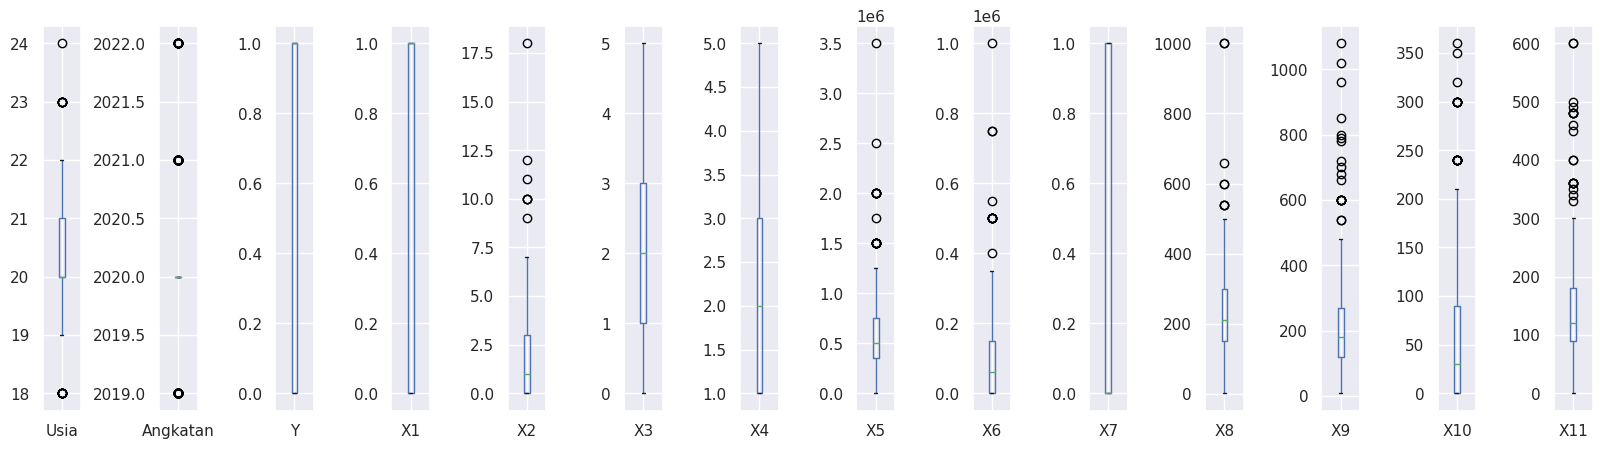

In [10]:
df2.plot( kind='box', subplots=True, sharey=False, figsize=(20, 5))

# increase spacing between subplots
plt.subplots_adjust(wspace=2) 
plt.show()

Berdasarkan visualisasi boxplot di atas dapat dilihat bahwa terdapat outliers untuk beberapa variabel, sehingga seharusnya perlu dilakukan remove outliers. Akan tetapi perlu diketahui bahwa setiap orang memiliki perbedaan opini maupun alokasi waktu terhadap variabel-variabel yang di analisis. Oleh karena itu, kita tilak akan membuang outliers dari setiap variabel karena outliers tersebut merupakan data asli (true outliers). 

### Descriptive Statistics

In [11]:
df2.describe()

,Usia,Angkatan,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,3.090000e+02,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,20.508091,2020.161812,0.731392,0.711974,1.754045,1.928803,2.304207,5.939681e+05,101125.242718,0.271845,231.902913,222.161812,58.860841,150.699029
std,1.046376,0.801600,0.443955,0.453578,2.226834,1.269566,1.427245,4.173043e+05,131619.532892,0.445632,130.565591,164.272302,74.705982,104.137381
min,18.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000
25%,20.000000,2020.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.500000e+05,0.000000,0.000000,150.000000,120.000000,0.000000,90.000000
50%,20.000000,2020.000000,1.000000,1.000000,1.000000,2.000000,2.000000,5.000000e+05,60000.000000,0.000000,210.000000,180.000000,30.000000,120.000000
75%,21.000000,2020.000000,1.000000,1.000000,3.000000,3.000000,3.000000,7.500000e+05,150000.000000,1.000000,300.000000,270.000000,90.000000,180.000000
max,24.000000,2022.000000,1.000000,1.000000,18.000000,5.000000,5.000000,3.500000e+06,1000000.000000,1.000000,1000.000000,1080.000000,360.000000,600.000000


Berdasarkan deskriptif statistik di atas, dapat disimpulkan bahwa:

- Rata-rata usia responden adalah 20.5 tahun, dimana hal tersebut berarti bahwa mayoritas responden kita berusia 20 dan 21 tahun. Usia termuda dari responden kita adalah 18 tahun dan usia tertua dari responden kita adalah 24 tahun.

- Responden berada di angkatan 2019 hingga 2022 dan mayoritas responden merupakan Mahasiswa angkatan 2020.

- Dengan menerapkan pembulatan ke atas, dapat dikatakan bahwa rata-rata jumlah hewan peliharaan yang dimiliki responden adalah 2 hewan.

- Dengan menerapkan pembulatan ke atas, menurut responden, rata-rata jumlah wajar hewan peliharaan adalah 2 hewan.

- Rata-rata pengeluaran mingguan responden adalah 593968,123. Dengan standard deviasi sebesar 417304,2863, dapat dikatakan bahwa pengeluaran mingguan responden berada di rentang 176663,837⩽pengeluaran mingguan⩽1011272,41.

- Rata-rata pengeluaran mingguan responden untuk hewan peliharaan adalah 101125,2427. Dengan standard deviasi sebesar 131619,5329, dapat dikatakan bahwa pengeluaran mingguan responden berada di rentang -30494,29⩽pengeluaran mingguan untuk hewan peliharaan⩽232744,776.

- Rata-rata jumlah responden yang pernah berdonasi atau berpartisipasi dalam komunitas pelindung hewan adalah sebesar 0.2718, dimana hal ini menunjukkan bahwa 72.82% responden tidak pernah berdonasi atau berpartisipasi dalam komunitas pelindung hewan.

- Rata-rata waktu yang dihabiskan responden untuk me time dalam satu hari adalah 231,9029 menit. Dengan standard deviasi sebesar 130,5656, dapat dikatakan bahwa rata-rata waktu responden untuk me time dalam satu hari berada di rentang 101,3373⩽waktu me time⩽362,4685.

- Rata-rata waktu yang dihabiskan responden untuk bersosialisasi dalam satu hari adalah 222,1618 menit. Dengan standard deviasi sebesar 164,2723, dapat dikatakan bahwa rata-rata waktu responden untuk bersosialisasi dalam satu hari berada di rentang 57,8895⩽waktu bersosialisasi⩽386,4341.

- Rata-rata waktu yang dihabiskan responden untuk berinteraksi dengan hewan peliharaan dalam satu hari adalah 58,8608 menit. Dengan standard deviasi sebesar 74,7060, dapat dikatakan bahwa rata-rata waktu responden untuk berinteraksi dengan hewan peliharaan dalam satu hari berada di rentang -15,8452⩽waktu berinteraksi dengan hewan peliharaan⩽133,5668.

- Rata-rata waktu yang dihabiskan responden untuk belajar atau berorganisasi dalam satu hari adalah 150,6990 menit. Dengan standard deviasi sebesar 104,1374, dapat dikatakan bahwa rata-rata waktu responden untuk belajar atau berorganisasi dalam satu hari berada di rentang 46,5616⩽waktu belajar atau berorganisasi⩽254,8364.

### Exploratory Data Analysis (EDA)

Data Visualization: Boxplot

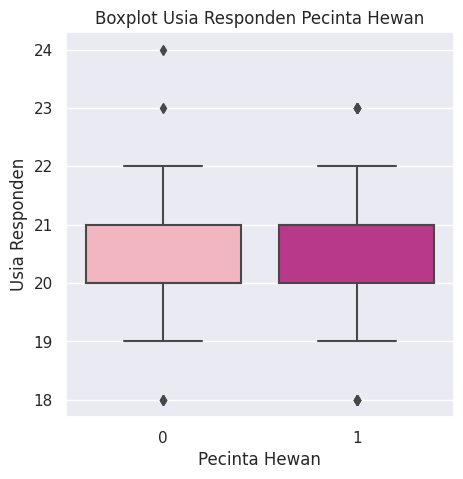

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=df2, x='Y', y='Usia', palette = 'RdPu')
plt.title("Boxplot Usia Responden Pecinta Hewan")
plt.xlabel('Pecinta Hewan')
plt.ylabel('Usia Responden')
plt.show()

Berdasarkan boxplot diatas, dapat disimpulkan bahwa keseluruhan responden baik yang merupakan pecinta hewan maupun yang bukan memiliki rentang usia yang sama, yaitu berkisar pada usia 19 hingga 22 tahun. 

Data Visualization: Pie Chart

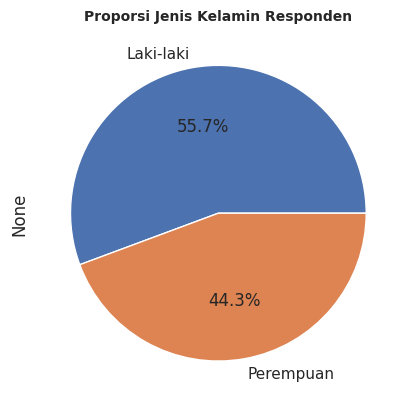

In [13]:
df2.groupby('Jenis Kelamin').size().plot(kind='pie', autopct='%.1f%%')
plt.title('Proporsi Jenis Kelamin Responden', fontweight='bold',fontsize=10)
sns.set_palette("Paired")

Berdasarkan pie chart di atas, dapat disimpulkan bahwa responden didominasi oleh laki-laki dengan proporsi 55.7%, sedangkan responden perempuan sejumlah 44.3%

In [14]:
dfk = df2[['Jenis Kelamin','Y']].groupby(['Jenis Kelamin']).agg({'Y':'value_counts'})
dfk

Y
Jenis Kelamin Y     
Laki-laki     1  118
              0   54
Perempuan     1  108
              0   29

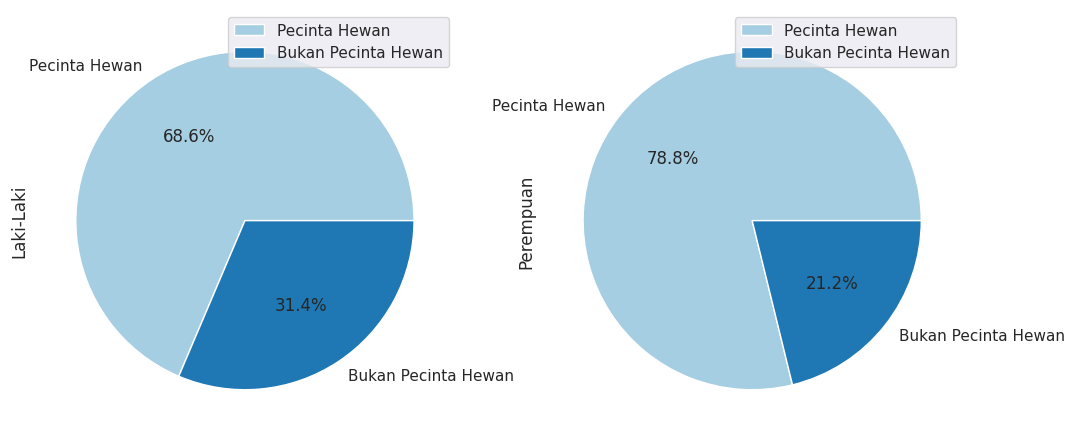

In [15]:
dfk1 = pd.DataFrame({'Laki-Laki': [118, 54],'Perempuan': [108, 29]},index=['Pecinta Hewan', 'Bukan Pecinta Hewan'])
dfk1.plot.pie(subplots=True, figsize=(12, 8), autopct='%.1f%%')
sns.set_palette("Paired")

Berdasarkan visualisasi data di atas, dapat disimpulkan bahwa:
1. Baik responden laki-laki maupun perempuan, keduanya didominasi oleh pecinta hewan. Namun proporsi pecinta hewan lebih didominasi oleh responden perempuan
2. 78.8% responden perempuan merupakan pecinta hewan dan 21.2% sisanya bukan pecinta hewan
3. 68.6% responden laki-laki merupakan pecinta hewan dan 31.4% sisanya bukan pecinta hewan

Data Visualization: Histogram

<AxesSubplot: title={'center': 'Jumlah Pecinta Hewan di Setiap Angkatan'}, xlabel='Angkatan', ylabel='count'>

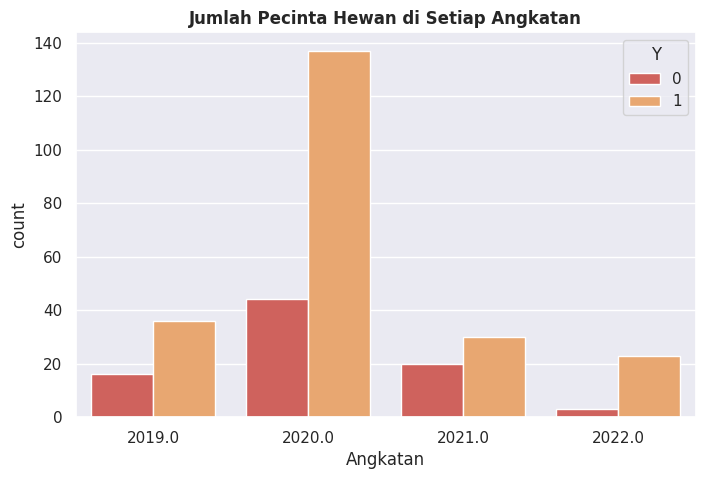

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
plt.title("Jumlah Pecinta Hewan di Setiap Angkatan", fontweight='bold',fontsize=12)
sns.set_palette("Spectral")
sns.countplot(data=df2, x='Angkatan', hue='Y')

Berdasarkan histogram diatas, dapat dilihat bahwa responden didominasi oleh mahasiswa angkatan 2020, lalu diikuti dengan angkatan 2019 dan 2021, dan yang paling sedikit berasal dari  angkatan 2022. Dapat dilihat juga bahwa jumlah responden yang merupakan pecinta hewan di setiap angkatan lebih banyak dibandingkan jumlah responden yang bukan merupakan pecinta hewan.

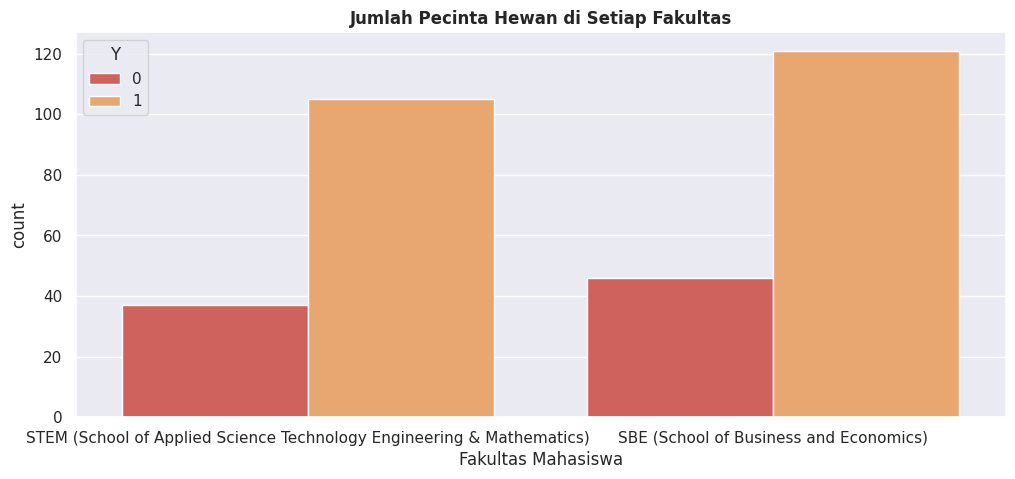

In [17]:
plt.subplots(figsize=(12, 5))
sns.countplot(x = 'Fakultas Mahasiswa', data = df2, hue = 'Y')
plt.title('Jumlah Pecinta Hewan di Setiap Fakultas', fontweight='bold',fontsize=12)
sns.set_palette("Spectral")
plt.show()

Berdasarkan histogram diatas, dapat dilihat bahwa responden didominasi oleh mahasiswa fakultas SBE (School of Business and Economics). Sama dengan histogram sebelumnya, jumlah responden yang merupakan pecinta hewan di setiap fakultas lebih banyak dibandingkan jumlah responden yang bukan merupakan pecinta hewan.

Text(0.5, 1.0, 'Histogram Jurusan Responden Pecinta Hewan')

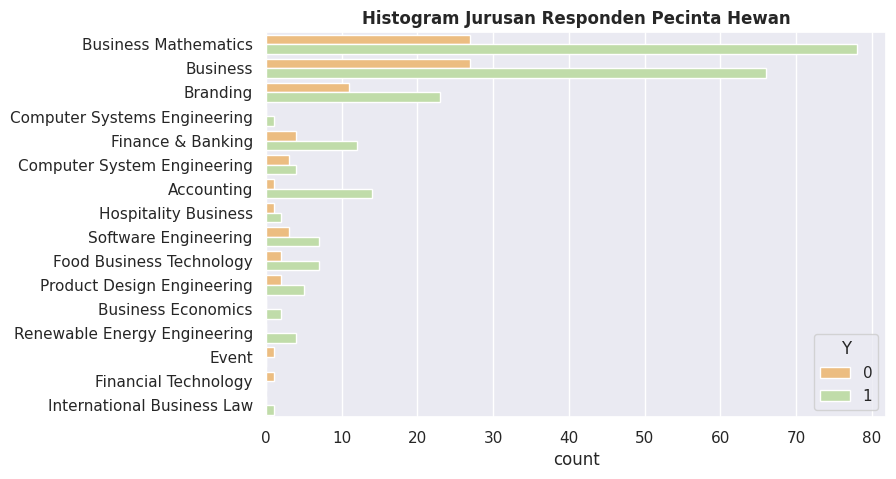

In [18]:
plt.figure(figsize = (8, 5))
sns.countplot(data = df2, y = 'Jurusan', hue='Y',orient = "h", palette = 'Spectral').set(ylabel = None)
plt.title('Histogram Jurusan Responden Pecinta Hewan', fontsize=12, fontweight='bold')

Berdasarkan histogram diatas, jurusan asal responden paling banyak berasal dari Business dan Business Mathematics. Lalu bisa dilihat juga bahwa hampir di jurusan apapun, seluruh responden yang memilih pecinta hewan lebih banyak dibandingkan dengan responden yang memilih tidak pecinta hewan.

In [19]:
df2.groupby('Jenis Kelamin')['Y'].value_counts(normalize=True)

Jenis Kelamin  Y
Laki-laki      1    0.686047
               0    0.313953
Perempuan      1    0.788321
               0    0.211679
Name: Y, dtype: float64

In [20]:
df2.groupby('Angkatan')['Y'].value_counts(normalize=True)

Angkatan  Y
2019.0    1    0.692308
          0    0.307692
2020.0    1    0.756906
          0    0.243094
2021.0    1    0.600000
          0    0.400000
2022.0    1    0.884615
          0    0.115385
Name: Y, dtype: float64

In [21]:
df2.groupby('Fakultas Mahasiswa')['Y'].value_counts(normalize=True)

Fakultas Mahasiswa                                                     Y
SBE (School of Business and Economics)                                 1    0.724551
                                                                       0    0.275449
STEM (School of Applied Science Technology Engineering & Mathematics)  1    0.739437
                                                                       0    0.260563
Name: Y, dtype: float64

In [22]:
df2.groupby('Jurusan')['Y'].value_counts(normalize=True)

Jurusan                       Y
Accounting                    1    0.933333
                              0    0.066667
Branding                      1    0.676471
                              0    0.323529
Business                      1    0.709677
                              0    0.290323
Business Economics            1    1.000000
Business Mathematics          1    0.742857
                              0    0.257143
Computer System Engineering   1    0.571429
                              0    0.428571
Computer Systems Engineering  1    1.000000
Event                         0    1.000000
Finance & Banking             1    0.750000
                              0    0.250000
Financial Technology          0    1.000000
Food Business Technology      1    0.777778
                              0    0.222222
Hospitality Business          1    0.666667
                              0    0.333333
International Business Law    1    1.000000
Product Design Engineering    1    0.714286


Heatmap Correlation Between Dependent and Independent Variable

In [23]:
df2.corr()

,Usia,Angkatan,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
Usia,1.000000,-0.798956,-0.005790,0.069914,0.038478,-0.006897,0.067915,0.021508,0.020829,-0.074360,0.056399,-0.061697,0.098804,-0.012775
Angkatan,-0.798956,1.000000,0.031297,0.012513,0.060565,0.075164,-0.003435,0.048448,0.055045,0.094596,-0.021875,0.043319,-0.024129,0.007975
Y,-0.005790,0.031297,1.000000,0.323983,0.107016,0.374950,-0.434266,0.159718,0.314667,0.255406,-0.090855,0.052062,0.393283,-0.045787
X1,0.069914,0.012513,0.323983,1.000000,0.453594,0.240546,-0.275470,0.233241,0.448399,0.211935,-0.120099,0.006423,0.451644,-0.076490
X2,0.038478,0.060565,0.107016,0.453594,1.000000,0.350949,-0.006007,0.158218,0.559663,0.097042,-0.163644,-0.088514,0.292583,-0.096968
X3,-0.006897,0.075164,0.374950,0.240546,0.350949,1.000000,-0.256782,0.305385,0.386896,0.223700,0.008165,0.067060,0.422530,0.031566
X4,0.067915,-0.003435,-0.434266,-0.275470,-0.006007,-0.256782,1.000000,-0.140931,-0.153228,-0.140653,0.045964,-0.144174,-0.219272,-0.104127
X5,0.021508,0.048448,0.159718,0.233241,0.158218,0.305385,-0.140931,1.000000,0.323841,0.035919,0.066295,0.130769,0.264808,-0.012960
X6,0.020829,0.055045,0.314667,0.448399,0.559663,0.386896,-0.153228,0.323841,1.000000,0.329397,-0.118135,0.008098,0.547218,-0.049261
X7,-0.074360,0.094596,0.255406,0.211935,0.097042,0.223700,-0.140653,0.035919,0.329397,1.000000,-0.007469,0.225900,0.434640,0.072501


<AxesSubplot: >

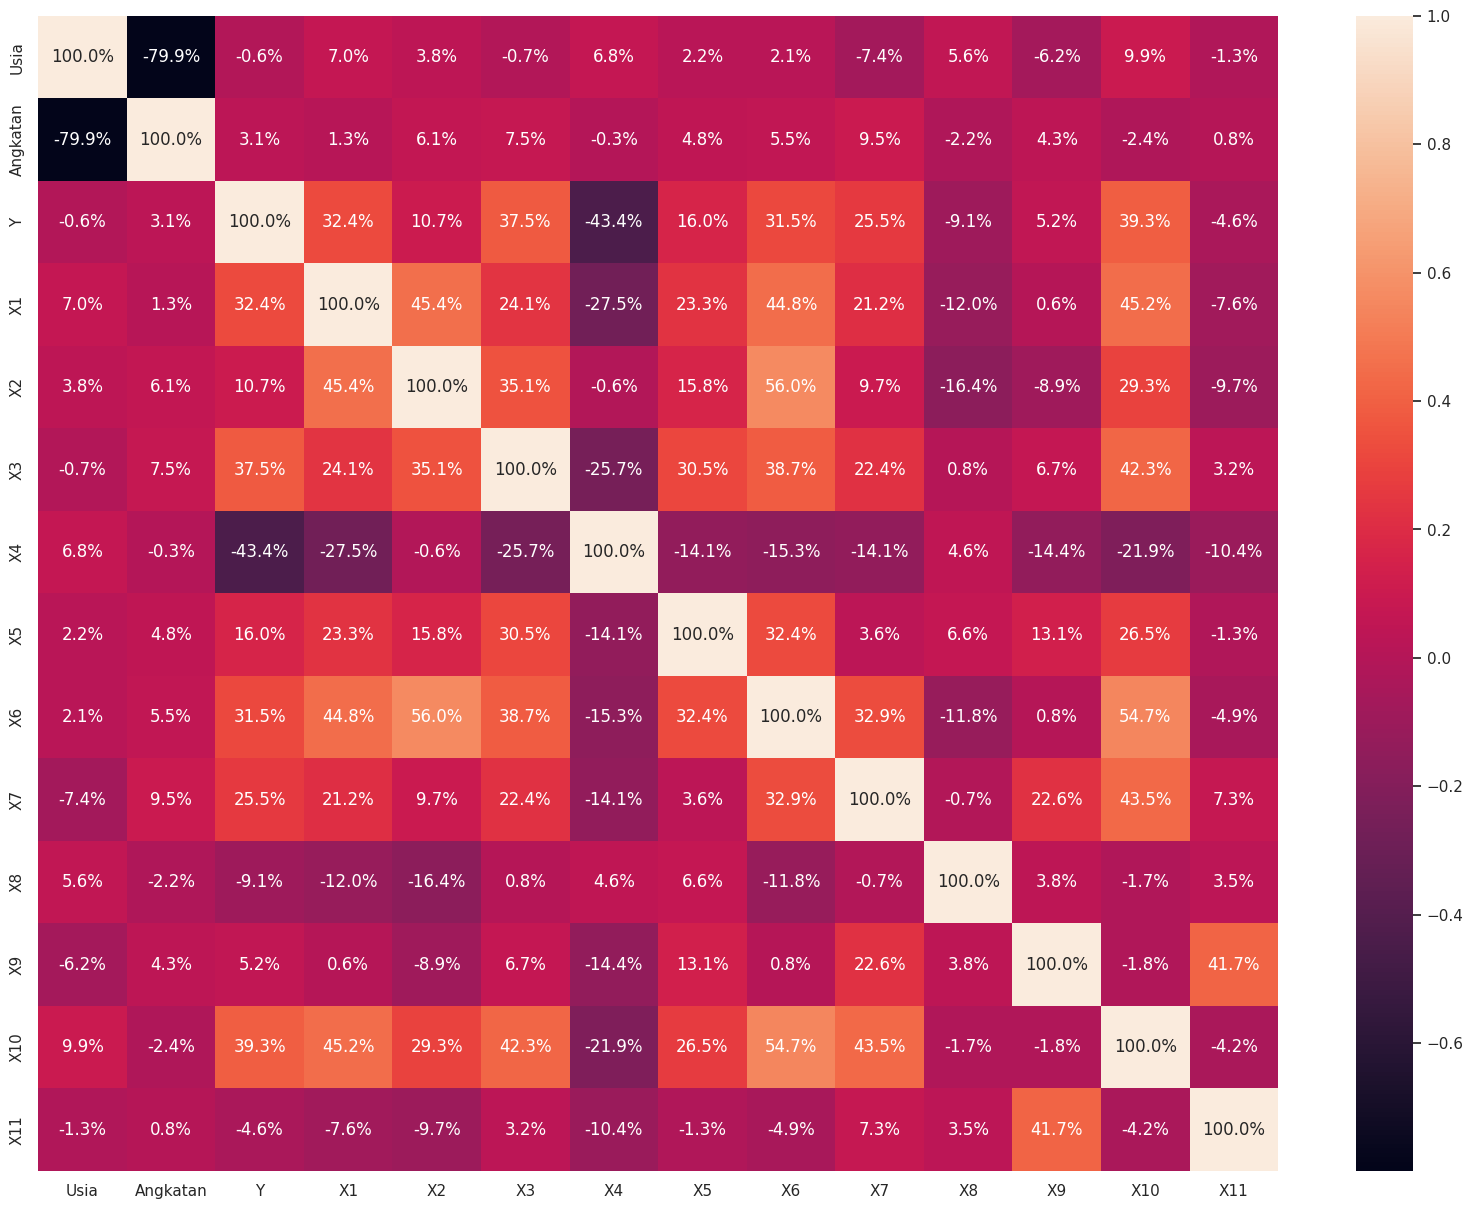

In [24]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df2.corr(), annot=True, fmt='.1%')

Dari Heat Map di atas, dapat dilihat bahwa terdapat hubungan yang beragam antarvariabel. Ada variabel yang berhubungan secara positif maupun negatif. Hal ini mengindikasikan bahwa hubungan antara variabel dependen dan variabel independent ada yang berbanding lurus dan juga ada yang berbanding terbalik. Variabel independen yang memiliki korelasi tertinggi terhadap variabel dependen adalah variabel X4. Variabel Independen yang memiliki korelasi cukup tinggi antara satu sama lainadalah X2 dengan X6 (56%) dan X6 dengan X10(55%).

### Splitting Data

Data akan dibagi menjadi 75% training data dan 25% testing data

In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2, test_size=0.25, random_state=70)
train_index = train.index
test_index = test.index

In [26]:
import statsmodels.api as sm

y_train = train['Y']
X_train = train[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']]
X_train = sm.add_constant(X_train)

In [27]:
y_test = test['Y']
X_test = test[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']]
X_test = sm.add_constant(X_test)

### K-Nearest Neighbor (KNN)

Modelling Data

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

KNN = KNeighborsClassifier(n_neighbors=18)

KNN.fit(X_train,y_train)

KNN_test_pred = KNN.predict(X_test)
KNN_train_pred = KNN.predict(X_train)

KNN_cm_train = confusion_matrix(y_train, KNN_train_pred)
KNN_cm_test = confusion_matrix(y_test, KNN_test_pred)

KNN_score_train=KNN.score(X_train,y_train)
KNN_score_test=KNN.score(X_test,y_test)

print('Train Accuracy Score:',f'{KNN_score_train: 0.2%}')
print('Test Accuracy Score:', f'{KNN_score_test: 0.2%}')

Train Accuracy Score:  76.19%
Test Accuracy Score:  70.51%


Confusion Matrix

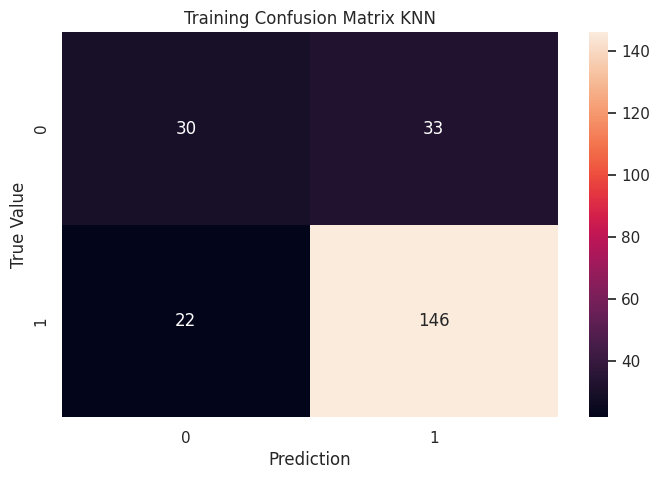

In [29]:
plt.figure(figsize=(8,5))
sns.heatmap(KNN_cm_train, annot=True, fmt='d')
plt.title("Training Confusion Matrix KNN")
plt.xlabel("Prediction")
plt.ylabel("True Value")
plt.show()

Berdasarkan heatmap diatas, dapat dilihat nilai- nilai dari Confusion Matrix modeling data kami sebagai berikut:

- True Negative Value sebanyak 30 data

- True Positive Value sebanyak 146 data

- False Negative Value sebanyak 22 data

- False Positive Value sebanyak 33 data

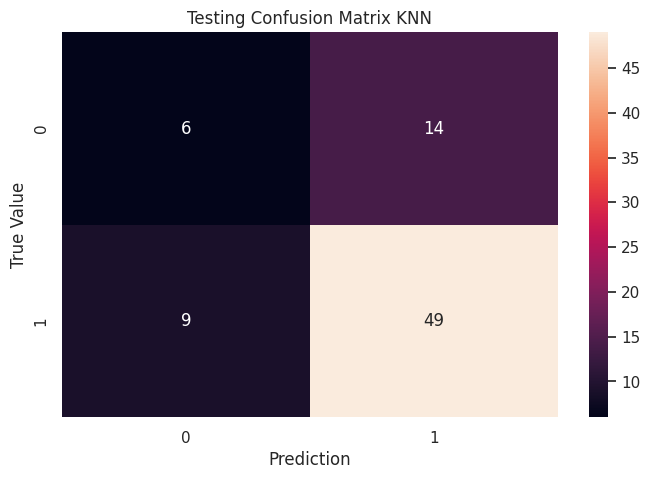

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(KNN_cm_test, annot=True, fmt='d')
plt.title("Testing Confusion Matrix KNN")
plt.xlabel("Prediction")
plt.ylabel("True Value")
plt.show()

Berdasarkan heatmap diatas, dapat dilihat nilai- nilai dari Confusion Matrix modeling data kami sebagai berikut:

- True Negative Value sebanyak 6 data

- True Positive Value sebanyak 49 data

- False Negative Value sebanyak 9 data

- False Positive Value sebanyak 14 data

Accuracy, Sensitivity, and Precision of Training Data

In [31]:
TN_train = KNN_cm_train[0, 0]
TP_train = KNN_cm_train[1, 1]
FN_train = KNN_cm_train[1, 0]
FP_train = KNN_cm_train[0, 1]

accuracy_train = (TN_train + TP_train) / (TN_train + FP_train + FN_train + TP_train)
sensitivity_train = TP_train / (TP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train)

print('The model accuracy of training data:', f'{accuracy_train: 0.2%}')
print('The model sensitivity of training data:', f'{sensitivity_train: 0.2%}')
print('The model precision of training data:', f'{precision_train: 0.2%}')

The model accuracy of training data:  76.19%
The model sensitivity of training data:  86.90%
The model precision of training data:  81.56%


Accuracy, Sensitivity, and Precision of Testing Data

In [32]:
TN_test = KNN_cm_test[0, 0]
TP_test = KNN_cm_test[1, 1]
FN_test = KNN_cm_test[1, 0]
FP_test = KNN_cm_test[0, 1]

accuracy_test = (TN_test + TP_test) / (TN_test + FP_test + FN_test + TP_test)
sensitivity_test = TP_test / (TP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test)

print('The model accuracy of testing data:', f'{accuracy_test: 0.2%}')
print('The model sensitivity of testing data:', f'{sensitivity_test: 0.2%}')
print('The model precision of testing data:', f'{precision_test: 0.2%}')

The model accuracy of testing data:  70.51%
The model sensitivity of testing data:  84.48%
The model precision of testing data:  77.78%


Comparison Between Training and Testing Data

In [33]:
metrics = ['Accuracy', 'Sensitivity', 'Precision']
performance_train = [accuracy_train, sensitivity_train, precision_train]
performance_test = [accuracy_test, sensitivity_test, precision_test]
performance1 = pd.DataFrame({'Metrics': metrics, 'Training Data': performance_train, 'Testing Data': performance_test})
performance1.style.format({'Training Data':'{:,.2%}', 'Testing Data':'{:.2%}'})

,Metrics,Training Data,Testing Data
0,Accuracy,76.19%,70.51%
1,Sensitivity,86.90%,84.48%
2,Precision,81.56%,77.78%


Accuracy menunjukkan performa keseluruhan dari pemodelan yang dibuat. Berdasarkan analisis, accuracy training data (76.19%) lebih besar dibandingkan testing data (70.51%)
Sensitivity merupakan tingkat akurasi model dalam menentukan penempatan data true positif dengan benar pada hasil positif. Berdasarkan analisis, sensitivity training data (86.90%) lebih besar dibandingkan testing data (84.48%)
Precision merupakan kedekatan nilai prediksi dengan nilai sesungguhnya. Berdasarkan analisis, training data (81.56%) lebih besar dibandingkan testing data (77.78%) 

Secara keseluruhan, nilai Accuracy, Sensitivity, and Precision training data lebih besar dibandingkan testing data, sehingga dapat dikatakan bahwa model ini overfitting.

### Decision Tree

Import Package for Decision Tree Analysis

In [34]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

Modelling Data

In [35]:
decisiontree = DecisionTreeClassifier(max_depth=5, random_state=42)
decisiontree = decisiontree.fit(X_train, y_train)

decisiontree_test_pred = decisiontree.predict(X_test)
decisiontree_train_pred = decisiontree.predict(X_train)

decisiontree_cm_train = confusion_matrix(y_train, decisiontree_train_pred)
decisiontree_cm_test = confusion_matrix(y_test, decisiontree_test_pred)

decisiontree_score_train=decisiontree.score(X_train,y_train)
decisiontree_score_test=decisiontree.score(X_test,y_test)

print('Train Accuracy Score:',f'{decisiontree_score_train: 0.2%}')
print('Test Accuracy Score:', f'{decisiontree_score_test: 0.2%}')

Train Accuracy Score:  94.37%
Test Accuracy Score:  78.21%


Confusion Matrix for Decision Tree

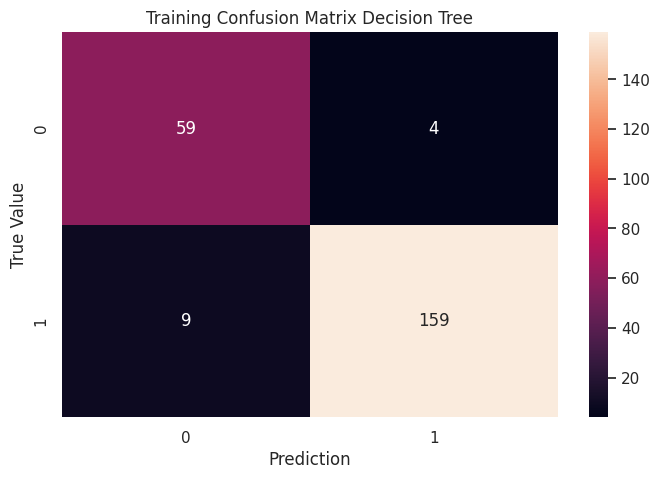

In [36]:
plt.figure(figsize=(8,5))
sns.heatmap(decisiontree_cm_train, annot=True, fmt='d')
plt.title("Training Confusion Matrix Decision Tree")
plt.xlabel("Prediction")
plt.ylabel("True Value")
plt.show()

Berdasarkan heatmap diatas, dapat dilihat nilai- nilai dari Confusion Matrix modeling data kami sebagai berikut:

- True Negative Value sebanyak 59 data

- True Positive Value sebanyak 159 data

- False Negative Value sebanyak 9 data

- False Positive Value sebanyak 4 data

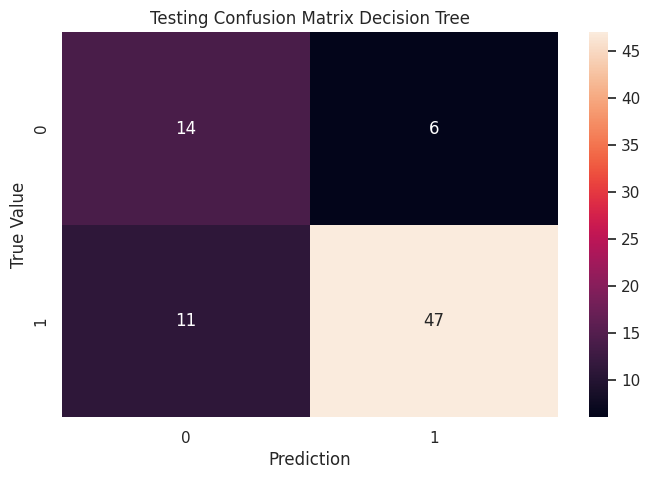

In [37]:
plt.figure(figsize=(8,5))
sns.heatmap(decisiontree_cm_test, annot=True, fmt='d')
plt.title("Testing Confusion Matrix Decision Tree")
plt.xlabel("Prediction")
plt.ylabel("True Value")
plt.show()

Berdasarkan heatmap diatas, dapat dilihat nilai- nilai dari Confusion Matrix modeling data kami sebagai berikut:

- True Negative Value sebanyak 14 data

- True Positive Value sebanyak 47 data

- False Negative Value sebanyak 11 data

- False Positive Value sebanyak 6 data

Accuracy, Sensitivity, and Precision of Training Data

In [38]:
dt_TN_train = decisiontree_cm_train[0, 0]
dt_TP_train = decisiontree_cm_train[1, 1]
dt_FN_train = decisiontree_cm_train[1, 0]
dt_FP_train = decisiontree_cm_train[0, 1]

dt_accuracy_train = (dt_TN_train + dt_TP_train) / (dt_TN_train + dt_FP_train + dt_FN_train + dt_TP_train)
dt_sensitivity_train = dt_TP_train / (dt_TP_train + dt_FN_train)
dt_precision_train = dt_TP_train / (dt_TP_train + dt_FP_train)

print('The model accuracy of training data:', f'{dt_accuracy_train: 0.2%}')
print('The model sensitivity of training data:', f'{dt_sensitivity_train: 0.2%}')
print('The model precision of training data:', f'{dt_precision_train: 0.2%}')

The model accuracy of training data:  94.37%
The model sensitivity of training data:  94.64%
The model precision of training data:  97.55%


Accuracy, Sensitivity, and Precision of Testing Data

In [39]:
dt_TN_test = decisiontree_cm_test[0, 0]
dt_TP_test = decisiontree_cm_test[1, 1]
dt_FN_test = decisiontree_cm_test[1, 0]
dt_FP_test = decisiontree_cm_test[0, 1]

dt_accuracy_test = (dt_TN_test + dt_TP_test) / (dt_TN_test + dt_FP_test + dt_FN_test + dt_TP_test)
dt_sensitivity_test = dt_TP_test / (dt_TP_test + dt_FN_test)
dt_precision_test = dt_TP_test / (dt_TP_test + dt_FP_test)

print('The model accuracy of training data:', f'{dt_accuracy_test: 0.2%}')
print('The model sensitivity of training data:', f'{dt_sensitivity_test: 0.2%}')
print('The model precision of training data:', f'{dt_precision_test: 0.2%}')

The model accuracy of training data:  78.21%
The model sensitivity of training data:  81.03%
The model precision of training data:  88.68%


Comparison Between Training and Testing Data

In [40]:
dt_metrics = ['Accuracy', 'Sensitivity', 'Precision']
dt_performance_train = [dt_accuracy_train, dt_sensitivity_train, dt_precision_train]
dt_performance_test = [dt_accuracy_test, dt_sensitivity_test, dt_precision_test]
dt_performance1 = pd.DataFrame({'Metrics': dt_metrics, 'Training Data': dt_performance_train, 'Testing Data': dt_performance_test})
dt_performance1.style.format({'Training Data':'{:,.2%}', 'Testing Data':'{:.2%}'})

,Metrics,Training Data,Testing Data
0,Accuracy,94.37%,78.21%
1,Sensitivity,94.64%,81.03%
2,Precision,97.55%,88.68%


Set X = indikator dan y = target

Accuracy menunjukkan performa keseluruhan dari pemodelan yang dibuat. Berdasarkan analisis, accuracy training data (94.37%) lebih besar dibanding testing data (78.21%).
Sensitivity merupakan tingkat akurasi model dalam menentukan penempatan data true positif dengan benar pada hasil positif. Berdasarkan analisis, sensitivity training data (94.64%) lebih besar dibandingkan testing data (81.03%).
Precision merupakan kedekatan nilai prediksi dengan nilai sesungguhnya. Berdasarkan analisis, training data (97.55%) lebih besar dibandingkan testing data (88.68%).

Secara keseluruhan, nilai Accuracy, Sensitivity, and Precision training data lebih besar dibandingkan testing data, sehingga dapat dikatakan bahwa model ini overfitting.

In [41]:
features=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']

X=df2[features]
y=df2['Y']

print(X)
print(y)

     X1   X2   X3  X4         X5        X6  X7     X8     X9    X10    X11
0     1  2.0  2.0   1  3500000.0   10000.0   0  180.0   60.0   20.0  120.0
1     1  2.0  2.0   1   200000.0   50000.0   0  360.0  120.0   60.0   60.0
2     1  1.0  3.0   2   185000.0  182500.0   0  300.0  120.0   60.0  600.0
3     1  0.0  2.0   1   100000.0       0.0   0  180.0  120.0    0.0   60.0
4     0  0.0  0.0   5   250000.0       0.0   0  240.0   45.0    0.0   30.0
..   ..  ...  ...  ..        ...       ...  ..    ...    ...    ...    ...
321   0  0.0  3.0   5  1000000.0       0.0   0  480.0  240.0    0.0  180.0
322   1  3.0  3.0   2   750000.0  150000.0   1  360.0  240.0  120.0  180.0
323   0  0.0  2.0   5  1000000.0       0.0   0  360.0  360.0    0.0  180.0
324   1  4.0  3.0   1   500000.0  250000.0   0  480.0  120.0  180.0  180.0
325   1  1.0  1.0   2  2000000.0  200000.0   0  540.0   60.0   30.0  300.0

[309 rows x 11 columns]
0      1
1      1
2      1
3      1
4      0
      ..
321    1
322    1
323

Decision Tree Model

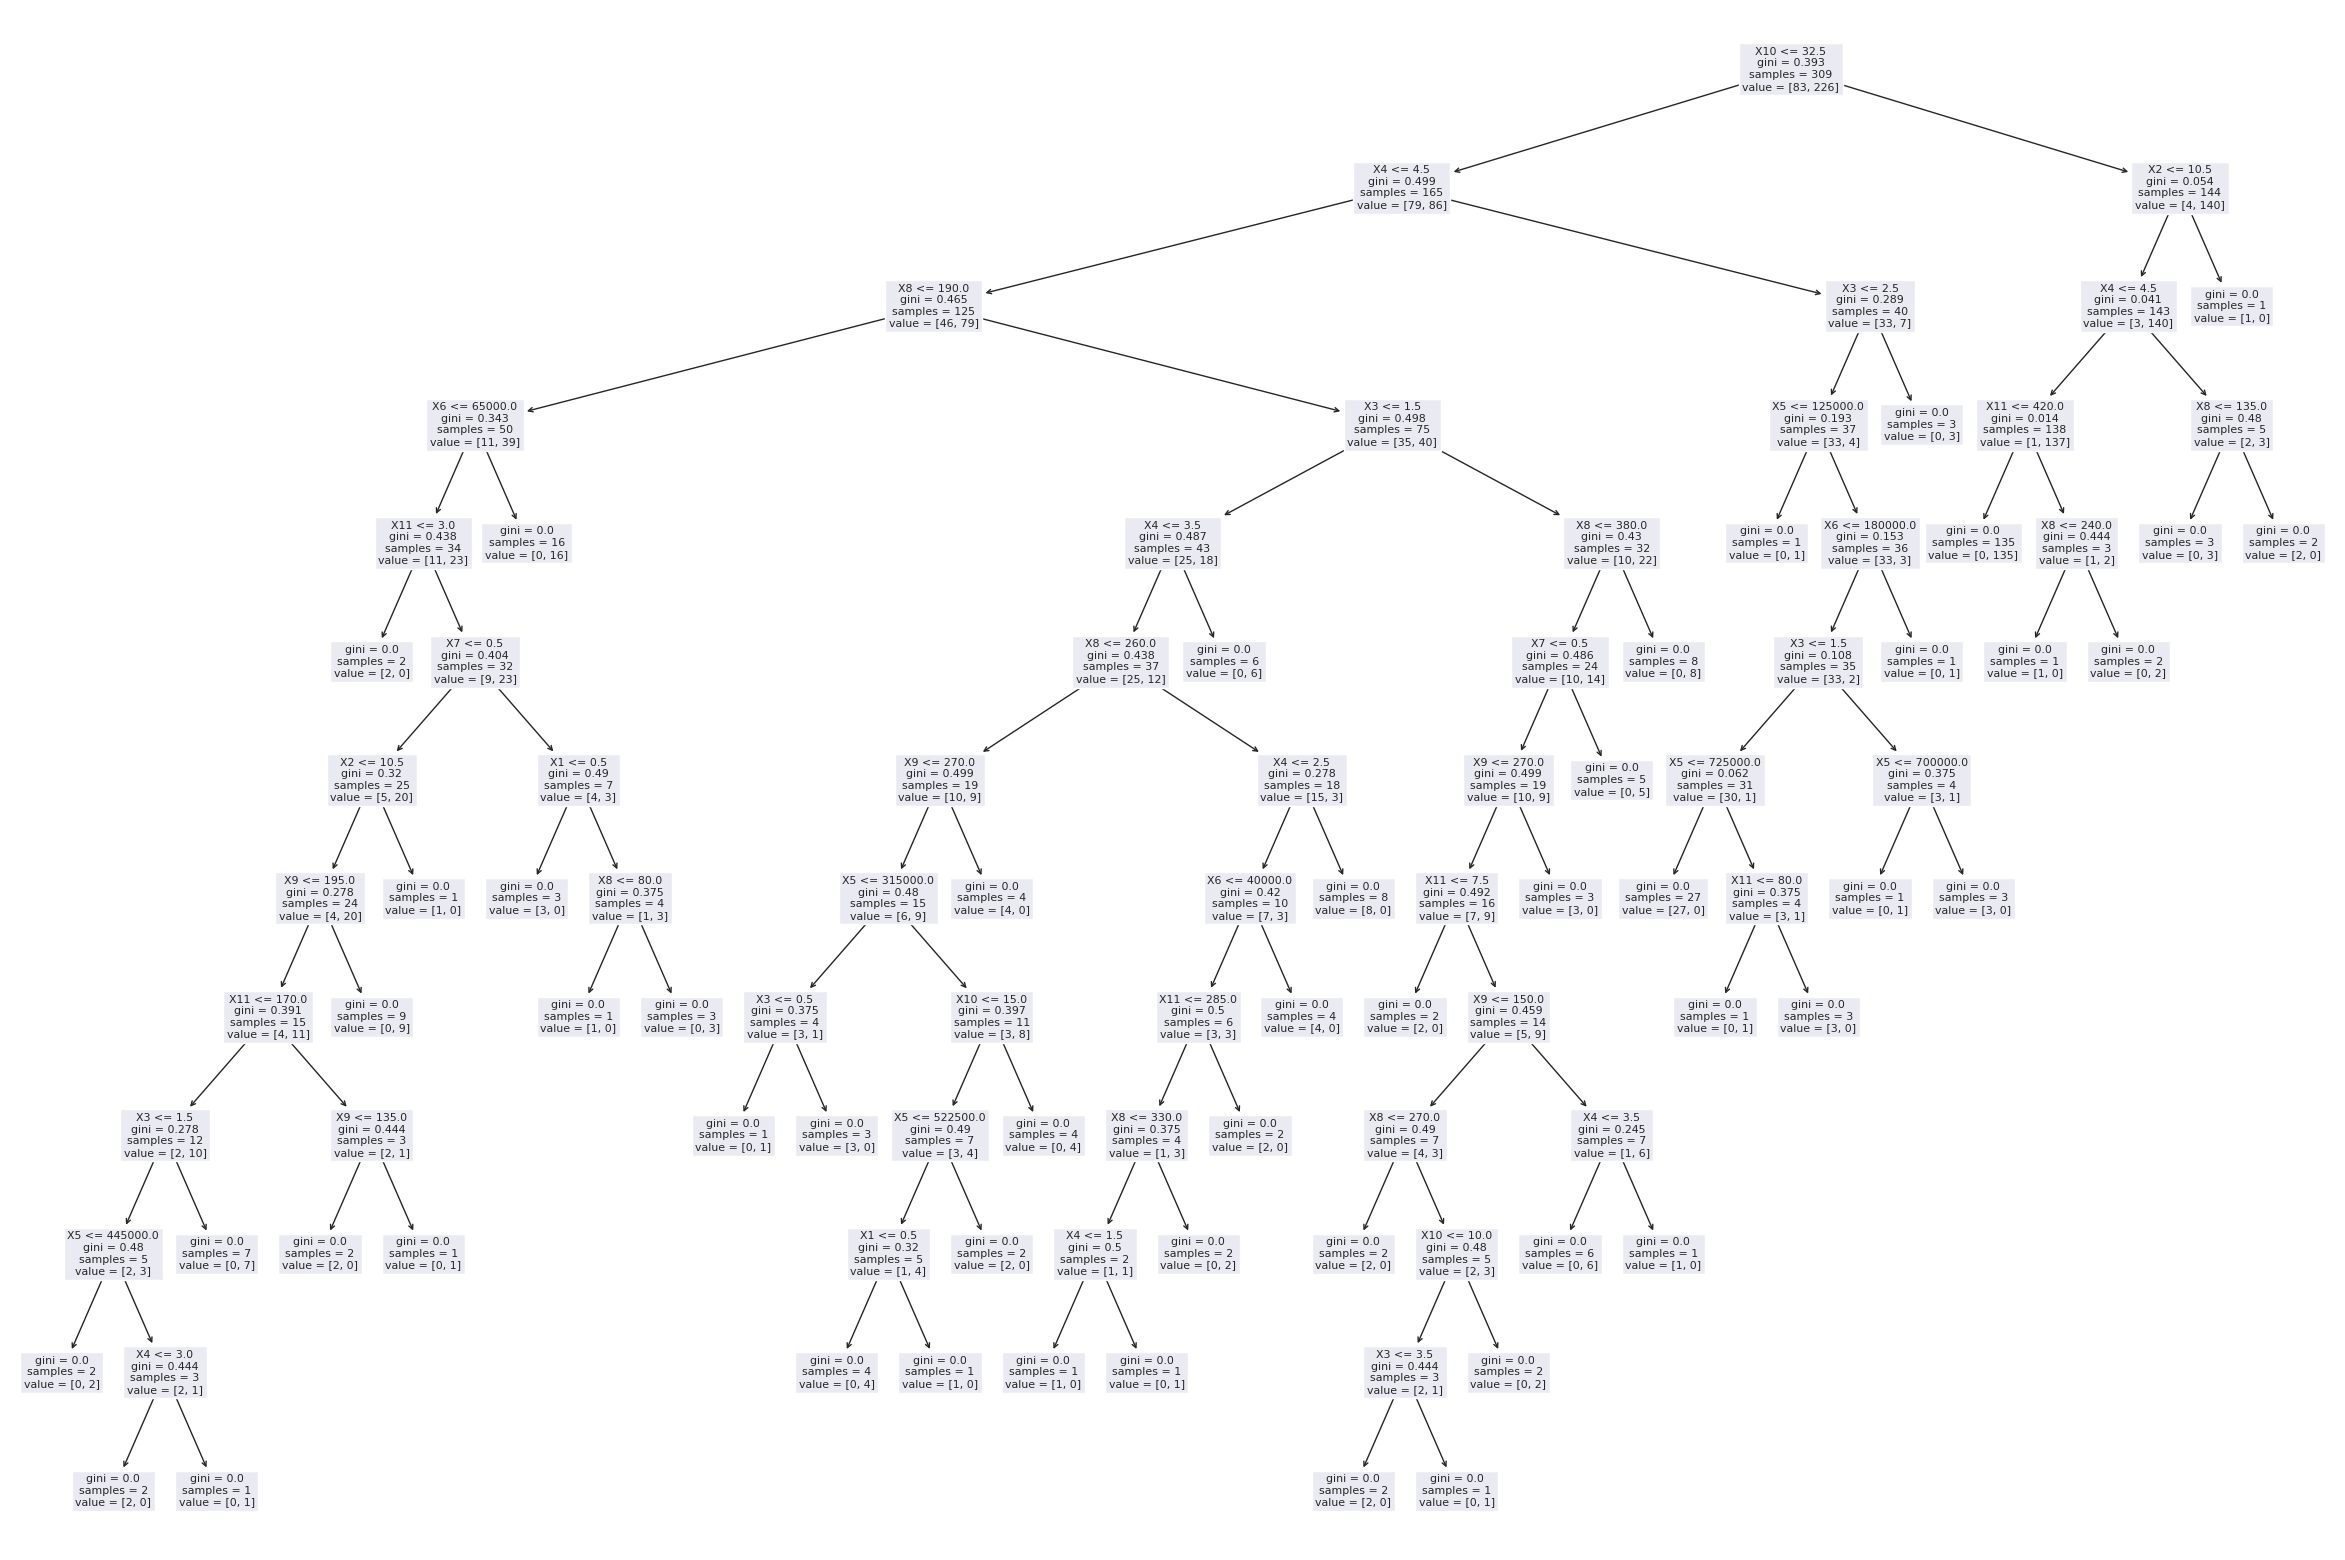

In [42]:
dtree=DecisionTreeClassifier()
dtree=dtree.fit(X,y)
fig, ax = plt.subplots(figsize=(30,20))  # Adjust the figsize according to your desired size
tree.plot_tree(dtree, feature_names=features, ax=ax)

plt.show()

**Contoh Pembacaan**

Dari desicion tree di atas, X10 (waktu interaksi dengan hewan) merupakan root node. Hal itu menunjukkan bahwa variabel waktu interaksi dengan hewan dapat mewakili seluruh variabel yang ada atau dapat dikatakan variabel yang paling mempengaruhi seseorang pecinta hewan atau tidak. Nilai Gini X10 adalah 0.393 menandakan bahwa sekitar 39.3% sampel akan menuju ke satu arah. Value X10 adalah [83,226] menunjukkan bahwa 226 responden merupakan pecinta hewan dan 83 responden bukan merupakan pecinta hewan. Selanjutnya, untuk panah yang bergerak ke kanan merupakan variabel X2 yaitu jumlah peliharaan. X2<=10.5 menandakan bahwa responden dengan jumlah peliharaan kurang dari 10 akan bergerak ke kiri dan sisanya akan bergerak ke kanan. Gini X2 yaitu 0.054 menandakan bahwa sekitar 5.4% sampel akan menuju ke satu arah. Value X2 [4,140] menjelaskan bahwa sebanyak 4 responden bukan merupakan pecinta hewan dan 140 responden merupakan pecinta hewan. Untuk panah selanjutnya yang bergerak ke kanan, nilai Gini yang dihasilkan adalah 0 sehingga dapat dikatakan panah ke kanan untuk X2 berhenti dengan jumlah sampel sebanyak 1 responden yang merupakan bukan pecinta hewan.

### Support Vector Machine (SVM)

In [43]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

**Hypertuning Parameters for SVM**
Nilai Default Untuk parameter C, fungsi Gamma dan Kernel

In [44]:
# Check default values
svc = SVC()
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


In [45]:
# Run model
svc.fit(X_train, y_train)
# Accuracy score
print(f'The accuracy score of the model is {svc.score(X_test, y_test):.4f}')

The accuracy score of the model is 0.7436


In [46]:
clf = svm.SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)

In [47]:
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.723 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.717 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.717 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.723 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.717 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.717 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.723 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

**Menggunakan Gridsearch untuk Menemukan Kombinasi Parameter Terbaik**
Hasil validasi silang pencarian grid menunjukkan bahwa nilai C= 1, nilai gamma=0.0001 dan kernel= 'rbf' memberikan hasil terbaik.

**SVM Model Fitting dengan Parameter Terbaik**

In [48]:
clfnew = svm.SVC(C= 1, gamma= 0.0001, kernel= 'rbf')
clfnew.fit(X_train,y_train)
svm_train_pred = clfnew.predict(X_train)
svm_test_pred = clfnew.predict(X_test)

svm_cm_train = confusion_matrix(y_train, svm_train_pred)
svm_cm_test = confusion_matrix(y_test, svm_test_pred)

In [49]:
svm_score_train=clfnew.score(X_train,y_train)
svm_score_test=clfnew.score(X_test,y_test)

In [50]:
from sklearn import metrics

Confusion Matrix for SVM

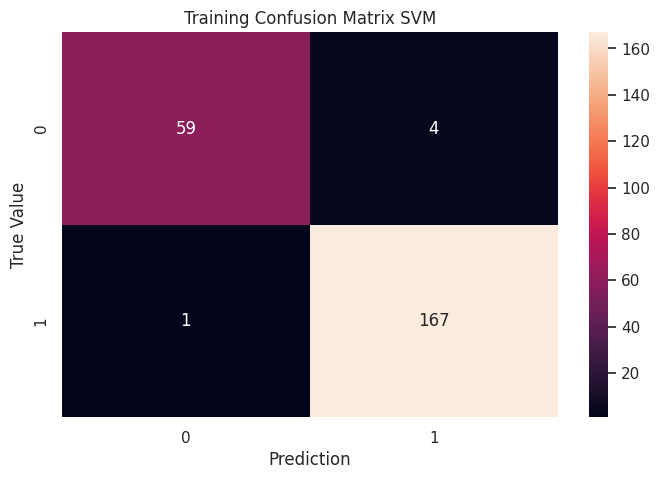

In [51]:
plt.figure(figsize=(8,5))
sns.heatmap(svm_cm_train, annot=True, fmt='d')
plt.title("Training Confusion Matrix SVM")
plt.xlabel("Prediction")
plt.ylabel("True Value")
plt.show()

- True Positive Value sebanyak 167 data

- False Negative Value sebanyak 1 data

- False Positive Value sebanyak 4 data

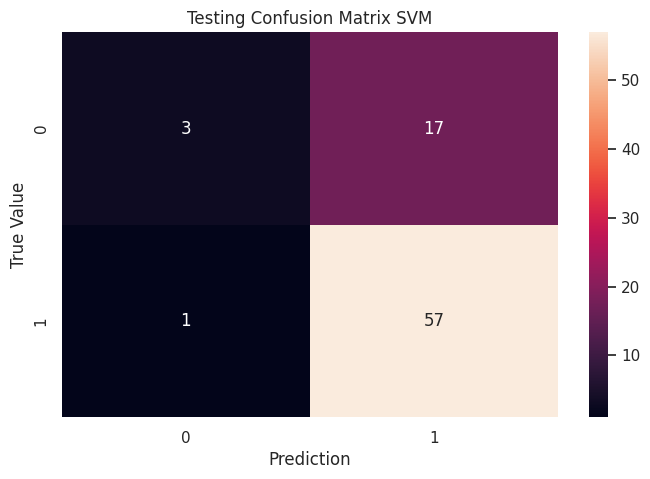

In [52]:
plt.figure(figsize=(8,5))
sns.heatmap(svm_cm_test, annot=True, fmt='d')
plt.title("Testing Confusion Matrix SVM")
plt.xlabel("Prediction")
plt.ylabel("True Value")
plt.show()

Berdasarkan heatmap diatas, dapat dilihat nilai- nilai dari Confusion Matrix modeling data kami sebagai berikut:

- True Negative Value sebanyak 57 data

- True Positive Value sebanyak 3 data

- False Negative Value sebanyak 1 data

- False Positive Value sebanyak 17 data

Accuracy, Sensitivity, and Precision of Training Data

In [53]:
svm_TN_train = svm_cm_train[0, 0]
svm_TP_train = svm_cm_train[1, 1]
svm_FN_train = svm_cm_train[1, 0]
svm_FP_train = svm_cm_train[0, 1]

svm_accuracy_train = (svm_TN_train + svm_TP_train) / (svm_TN_train + svm_FP_train + svm_FN_train + svm_TP_train)
svm_sensitivity_train = svm_TP_train / (svm_TP_train + svm_FN_train)
svm_precision_train = svm_TP_train / (svm_TP_train + svm_FP_train)

print('The model accuracy of training data:', f'{svm_accuracy_train: 0.2%}')
print('The model sensitivity of training data:', f'{svm_sensitivity_train: 0.2%}')
print('The model precision of training data:', f'{svm_precision_train: 0.2%}')

The model accuracy of training data:  97.84%
The model sensitivity of training data:  99.40%
The model precision of training data:  97.66%


Accuracy, Sensitivity, and Precision of Testing Data

In [54]:
svm_TN_test = svm_cm_test[0, 0]
svm_TP_test = svm_cm_test[1, 1]
svm_FN_test = svm_cm_test[1, 0]
svm_FP_test = svm_cm_test[0, 1]

svm_accuracy_test = (svm_TN_test + svm_TP_test) / (svm_TN_test + svm_FP_test + svm_FN_test + svm_TP_test)
svm_sensitivity_test = svm_TP_test / (svm_TP_test + svm_FN_test)
svm_precision_test = svm_TP_test / (svm_TP_test + svm_FP_test)

print('The model accuracy of testing data:', f'{svm_accuracy_test: 0.2%}')
print('The model sensitivity of testing data:', f'{svm_sensitivity_test: 0.2%}')
print('The model precision of testing data:', f'{svm_precision_test: 0.2%}')

The model accuracy of testing data:  76.92%
The model sensitivity of testing data:  98.28%
The model precision of testing data:  77.03%


Comparison Between Training and Testing Data

In [55]:
metrics = ['Accuracy', 'Sensitivity', 'Precision']
svm_performance_train = [svm_accuracy_train, svm_sensitivity_train, svm_precision_train]
svm_performance_test = [svm_accuracy_test, svm_sensitivity_test, svm_precision_test]
svm_performance1 = pd.DataFrame({'Metrics': metrics, 'Training Data': svm_performance_train, 'Testing Data': svm_performance_test})
svm_performance1.style.format({'Training Data':'{:,.2%}', 'Testing Data':'{:.2%}'})

,Metrics,Training Data,Testing Data
0,Accuracy,97.84%,76.92%
1,Sensitivity,99.40%,98.28%
2,Precision,97.66%,77.03%


Accuracy menunjukkan performa keseluruhan dari pemodelan yang dibuat. Berdasarkan analisis, accuracy training data (97.84%) lebih besar dibanding testing data (76.92%).
Sensitivity merupakan tingkat akurasi model dalam menentukan penempatan data true positif dengan benar pada hasil positif. Berdasarkan analisis, sensitivity training data (99.40%) lebih besar dibandingkan testing data (98.28%).
Precision merupakan kedekatan nilai prediksi dengan nilai sesungguhnya. Berdasarkan analisis, training data (97.66%) lebih besar dibandingkan testing data (77.03%).

Secara keseluruhan, nilai Accuracy, Sensitivity, and Precision training data lebih besar dibandingkan testing data, sehingga dapat dikatakan bahwa model ini overfitting.

### Comparison Between The 3 Models

In [62]:
accuracy_test

0.7051282051282052

In [66]:
train_accuracy1 = accuracy_train, dt_accuracy_train, svm_accuracy_train
test_accuracy1 = accuracy_test, dt_accuracy_test, svm_accuracy_test
train_sensitivity1 = sensitivity_train, dt_sensitivity_train, svm_sensitivity_train
test_sensitivity1 = sensitivity_test, dt_sensitivity_test, svm_sensitivity_test
train_precision1 = precision_train, dt_precision_train, svm_precision_train
test_precision1 = precision_test, dt_precision_test, svm_precision_test

comparison = {'Metode':['KNN', 'Decision Tree', 'SVM'], 
              'Training Accuracy':train_accuracy1,'Testing Accuracy':test_accuracy1,
              'Training Sensitivity':train_sensitivity1,'Testing Sensitivity':test_sensitivity1,
              'Training Precision':train_precision1,'Testing Precision':test_precision1}
comparison = pd.DataFrame(comparison)
comparison

,Metode,Training Accuracy,Testing Accuracy,Training Sensitivity,Testing Sensitivity,Training Precision,Testing Precision
0,KNN,0.761905,0.705128,0.869048,0.844828,0.815642,0.777778
1,Decision Tree,0.943723,0.782051,0.946429,0.810345,0.975460,0.886792
2,SVM,0.978355,0.769231,0.994048,0.982759,0.976608,0.770270


### Conclusion

Semua model menunjukkan adanya overfitting. Sebagai pembanding, metric akurasi digunakan untuk mengevaluasi masing masing model. Dilihat dari nilai akurasi data training yang lebih besar dibandingkan data testing. Maka dengan ini, ketiga model belum bisa secara pasti merefleksikan mengklasifikasikan jika seseorang adalah pecinta hewan atau tidak berdasarkan 11 variabel independen tersebut. Jika membandingkan antara ketiga model, Decision Tree merupakan metode klasifikasi yang paling bagus dengan nilai akurasi testing yang paling besar.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9fd31fe9-66e8-466a-99f6-f1b2c0254f23' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>